In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')


In [4]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [5]:
# Create a crosstab between the product category and the isBestSeller status.


In [6]:
crosstab_result = pd.crosstab( df['category'], df['isBestSeller'])

In [7]:
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
# Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category and then
# sort the categories based on this proportion in descending order.
(crosstab_result[True]/(crosstab_result[True]+crosstab_result[False])).sort_values(ascending=False)

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [9]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [10]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

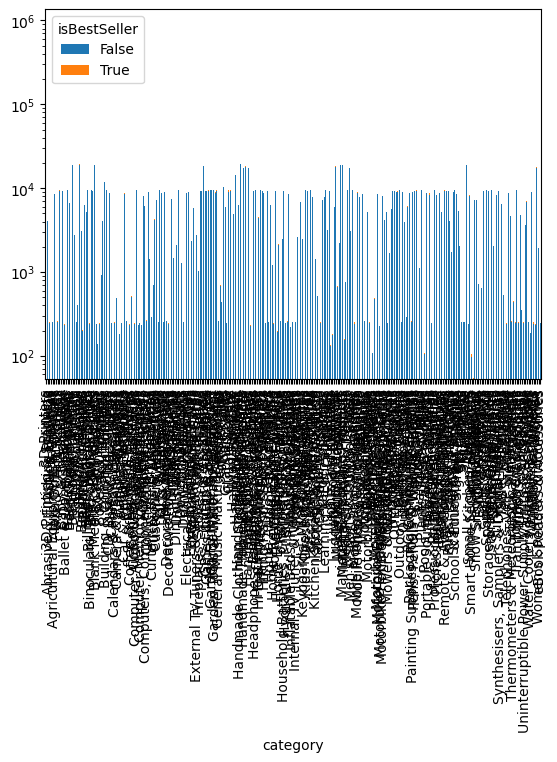

In [12]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True, logy=True)

In [ ]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5
#  times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the
# dataset. The next steps will be done with the dataframe without outliers.

In [ ]:
def interquartile_range():
    df['salePrice']